In [1]:
# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [2]:
# student 1: Mulugeta makata 2348 
# student 2:Hodaya Samuel

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [4]:
train_file = "wine_train.csv"  # File name for the training data
test_file = "wine_test.csv"  # File name for the test data

train_filepath = os.path.join(".", train_file)  # Create the full path for the training file
test_filepath = os.path.join(".", test_file)  # Create the full path for the test file

train_df = pd.read_csv(train_filepath)  # Load the training data into a DataFrame
test_df = pd.read_csv(test_filepath)  # Load the test data into a DataFrame

train_df.head()  # Display the first few rows of the training data


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [5]:
test_df.head() 


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [6]:
summary_stats = train_df.describe()  # Get summary statistics for the training data
summary_stats_df = pd.DataFrame(summary_stats)  # Convert the summary statistics into a DataFrame
summary_stats_df  


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


In [7]:
class_distribution_df = train_df['target'].value_counts().reset_index()  # Count the occurrences of each target class
class_distribution_df.columns = ['Class', 'Count']  # Rename the columns to 'Class' and 'Count'
print("\nClass Distribution:") 
display(class_distribution_df)  



Class Distribution:


,Class,Count
0,1,57
1,0,48
2,2,37


In [8]:
correlation_matrix = train_df.corr()  # Calculate the correlation matrix for the training data
correlation_df = pd.DataFrame(correlation_matrix)  # Convert the correlation matrix to a DataFrame
correlation_df  


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.125775,0.266255,-0.324234,0.308843,0.271331,0.247231,-0.088818,0.137788,0.538669,-0.009125,0.066571,0.668455,-0.342386
malic_acid,0.125775,1.000000,0.191182,0.282662,0.020063,-0.322301,-0.388624,0.287977,-0.185538,0.250443,-0.550526,-0.328693,-0.150744,0.392434
ash,0.266255,0.191182,1.000000,0.423830,0.378546,0.161905,0.164921,0.148841,0.065193,0.270956,-0.067239,0.040355,0.275818,-0.109604
alcalinity_of_ash,-0.324234,0.282662,0.423830,1.000000,-0.011331,-0.314082,-0.328843,0.316834,-0.210546,-0.016108,-0.258432,-0.260420,-0.419231,0.502200
magnesium,0.308843,0.020063,0.378546,-0.011331,1.000000,0.209336,0.182837,-0.232630,0.145813,0.244744,0.021679,0.054141,0.388856,-0.215107
total_phenols,0.271331,-0.322301,0.161905,-0.314082,0.209336,1.000000,0.869634,-0.414451,0.625767,-0.068393,0.442778,0.716507,0.488763,-0.726069
flavanoids,0.247231,-0.388624,0.164921,-0.328843,0.182837,0.869634,1.000000,-0.515106,0.680019,-0.133475,0.529995,0.781781,0.489195,-0.838060
nonflavanoid_phenols,-0.088818,0.287977,0.148841,0.316834,-0.232630,-0.414451,-0.515106,1.000000,-0.382196,0.164591,-0.293616,-0.481035,-0.229793,0.455551
proanthocyanins,0.137788,-0.185538,0.065193,-0.210546,0.145813,0.625767,0.680019,-0.382196,1.000000,-0.028767,0.291350,0.546202,0.345552,-0.542524
color_intensity,0.538669,0.250443,0.270956,-0.016108,0.244744,-0.068393,-0.133475,0.164591,-0.028767,1.000000,-0.487257,-0.419104,0.350029,0.236329


In [9]:
correlation_threshold = 0.55  # Set the threshold for strong correlations

# Keep correlations above the threshold and exclude self-correlations (correlation < 1.0)
strong_correlations = correlation_matrix.where((correlation_matrix.abs() > correlation_threshold) & (correlation_matrix < 1.0))  

# Drop columns where all values are NaN (no strong correlations)
filtered_correlations = strong_correlations.dropna(how='all', axis=1)  

# Drop rows where all values are NaN (no strong correlations)
cleaned_correlations = filtered_correlations.dropna(how='all', axis=0)  

cleaned_correlations


,alcohol,malic_acid,total_phenols,flavanoids,proanthocyanins,hue,od280/od315_of_diluted_wines,proline,target
alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.668455,NaN
malic_acid,NaN,NaN,NaN,NaN,NaN,-0.550526,NaN,NaN,NaN
total_phenols,NaN,NaN,NaN,0.869634,0.625767,NaN,0.716507,NaN,-0.726069
flavanoids,NaN,NaN,0.869634,NaN,0.680019,NaN,0.781781,NaN,-0.838060
proanthocyanins,NaN,NaN,0.625767,0.680019,NaN,NaN,NaN,NaN,NaN
hue,NaN,-0.550526,NaN,NaN,NaN,NaN,0.575794,NaN,-0.618881
od280/od315_of_diluted_wines,NaN,NaN,0.716507,0.781781,NaN,0.575794,NaN,NaN,-0.788087
proline,0.668455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.632869
target,NaN,NaN,-0.726069,-0.838060,NaN,-0.618881,-0.788087,-0.632869,NaN


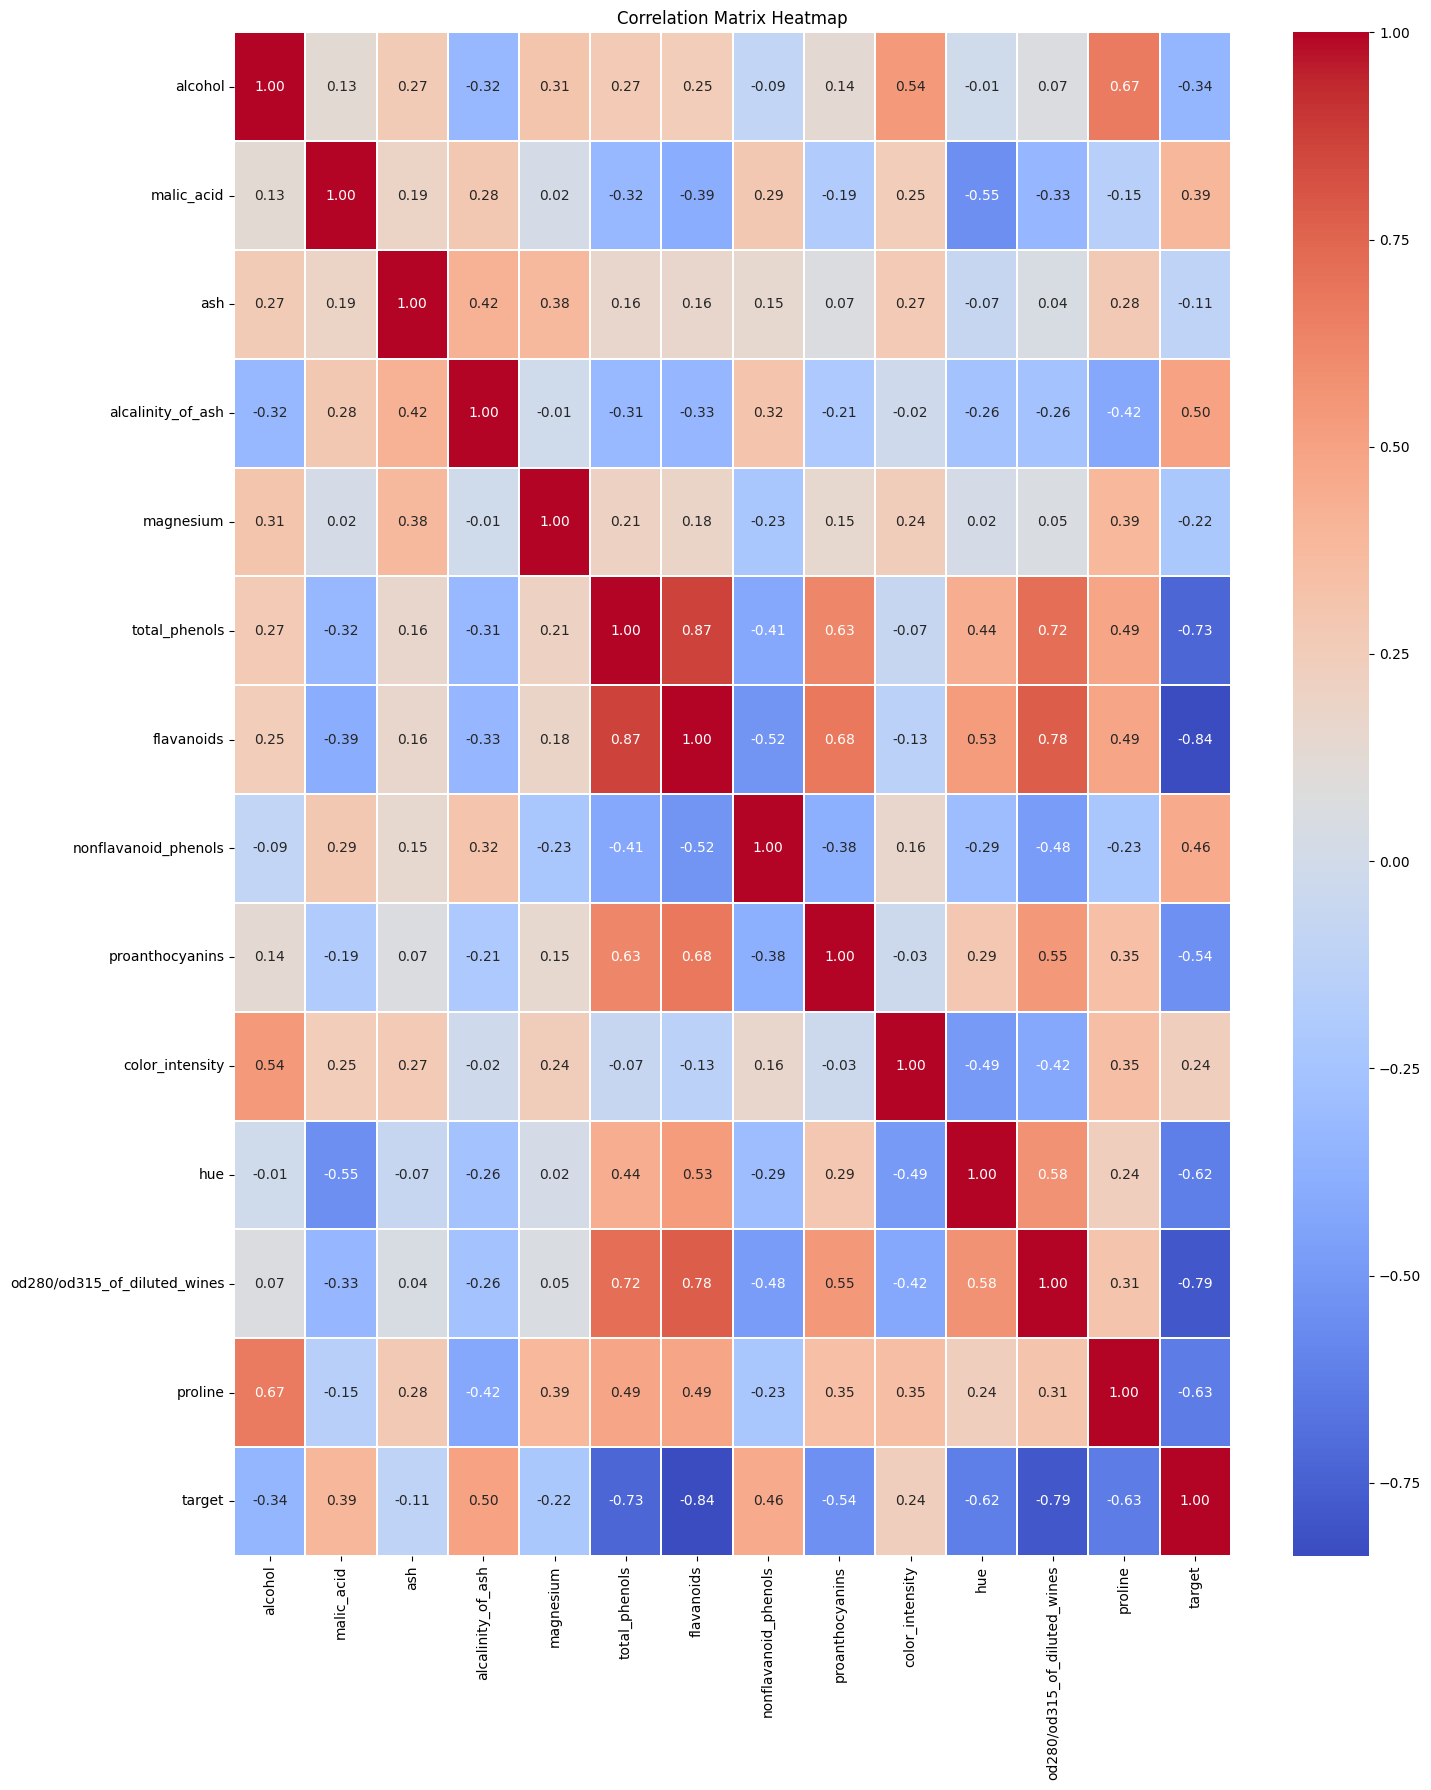

In [10]:
corr = train_df.corr()  # Calculate the correlation matrix
plt.figure(figsize=(15, 18))  # Set the figure size for better readability

# Create a heatmap with color scale 'coolwarm', show correlation values, format to 2 decimal places
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.10)  

plt.title('Correlation Matrix Heatmap')  # Add title to the heatmap
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()  


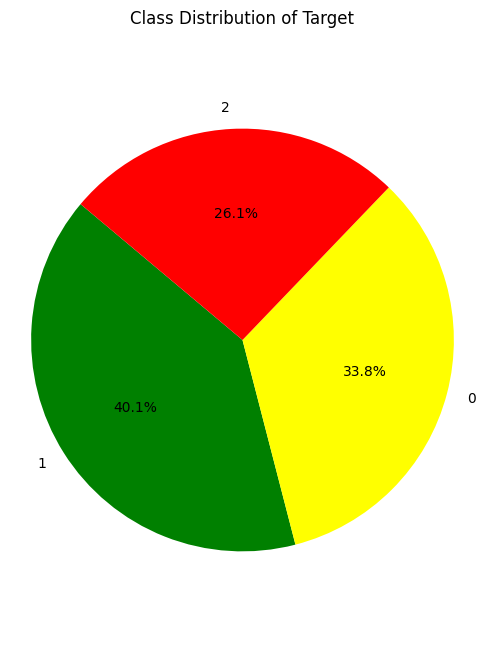

In [11]:
target_class_counts = train_df['target'].value_counts()  # Get the counts of each class in the 'target' column
slice_colors = ['green', 'yellow', 'red']  # Define colors for each slice in the pie chart

plt.figure(figsize=(6, 8))  # Set the figure size for the pie chart

# Create the pie chart, show percentage, and use custom colors
plt.pie(target_class_counts, labels=target_class_counts.index, autopct='%1.1f%%', startangle=140, colors=slice_colors)  

plt.title('Class Distribution of Target')  # Add a title to the chart
plt.axis('equal')  # Ensure the pie chart is a perfect circle
plt.show()  


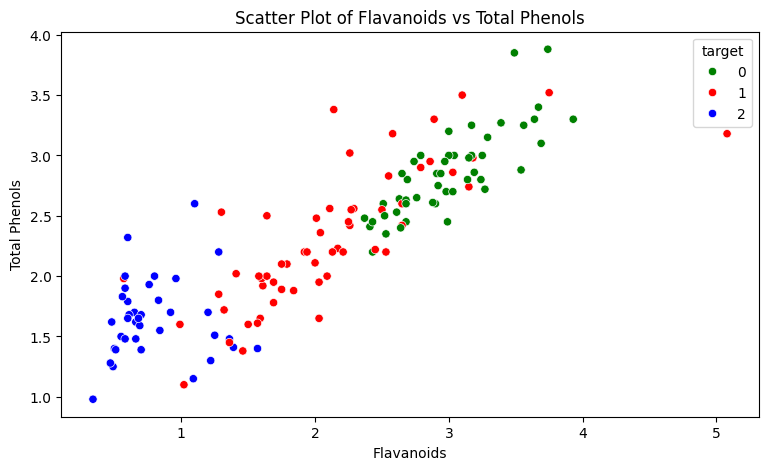

In [12]:
plt.figure(figsize=(9, 5))  # Set the size of the plot
custom_palette = {0: 'green', 1: 'red', 2: 'blue'}  # Define colors for each class in the target column

# Create a scatter plot with flavanoids on the x-axis and total phenols on the y-axis, using custom colors based on target class
sns.scatterplot(x='flavanoids', y='total_phenols', hue='target', data=train_df, palette=custom_palette)  

plt.title('Scatter Plot of Flavanoids vs Total Phenols')  # Add a title to the plot
plt.xlabel('Flavanoids')  # Label for x-axis
plt.ylabel('Total Phenols')  # Label for y-axis
plt.show()  


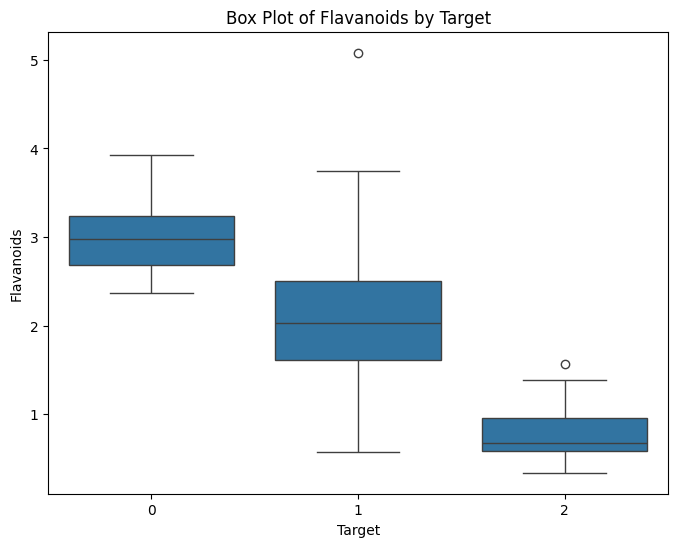

In [13]:
plt.figure(figsize=(8, 6))  # Set the size of the plot

# Create a box plot showing the distribution of flavanoids for each target class
boxplot = sns.boxplot(x='target', y='flavanoids', data=train_df)  

plt.title('Box Plot of Flavanoids by Target')  # Add a title to the plot
plt.xlabel('Target')  # Label for x-axis (target classes)
plt.ylabel('Flavanoids')  # Label for y-axis (flavanoids values)
plt.show() 


In [14]:
# Drop the 'target' and 'total_phenols' columns to get the features for training
feature_cols = train_df.drop(['target', 'total_phenols'], axis=1)

# Split the data into training and validation sets. 
# X_train, y_train are for training and X_validation, y_validation for testing/validation.
# test_size=0.2 means 20% of the data will be used for validation.
X_train, X_validation, y_train, y_validation = train_test_split(feature_cols, train_df['target'], test_size=0.2, random_state=42)  



In [15]:

# Define pipelines for each classifier
pipeline_knn = Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier())  ])

pipeline_dtc = Pipeline([('scaler', StandardScaler()),  ('classifier', DecisionTreeClassifier())])

pipeline_gaussian_nb = Pipeline([('scaler', StandardScaler()), ('classifier', GaussianNB()) ])

In [16]:
#Define the best hyperparameters for each model
param_grid_nb = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7],
    'classifier__priors': [None, [0.1, 0.2, 0.7], [0.3, 0.3, 0.4]]
}

param_grid_knn = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__n_neighbors': [3, 5, 10],
    'classifier__metric': ['euclidean', 'manhattan', 'chebyshev'],
    'classifier__algorithm': ['auto', 'brute']
}

param_grid_dtc = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__max_depth': [3, 5, 8],
    'classifier__min_samples_split': [2, 5, 10]
}

In [17]:
# Create GridSearchCV for each classifier
grid_search_knn = GridSearchCV(pipeline_knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_dtc = GridSearchCV(pipeline_dtc, param_grid=param_grid_dtc, cv=5, scoring='accuracy')
grid_search_gaussian_nb = GridSearchCV(pipeline_gaussian_nb, param_grid=param_grid_nb, cv=5, scoring='accuracy')

# Fit GridSearchCV for each classifier
grid_search_knn.fit(X_train, y_train)
grid_search_dtc.fit(X_train, y_train)
grid_search_gaussian_nb.fit(X_train, y_train)


# Extract hyperparameters and scores for each model
params_nb = grid_search_gaussian_nb.cv_results_['params']
scores_nb = grid_search_gaussian_nb.cv_results_['mean_test_score']

params_knn = grid_search_knn.cv_results_['params']
scores_knn = grid_search_knn.cv_results_['mean_test_score']

params_dtc = grid_search_dtc.cv_results_['params']
scores_dtc = grid_search_dtc.cv_results_['mean_test_score']



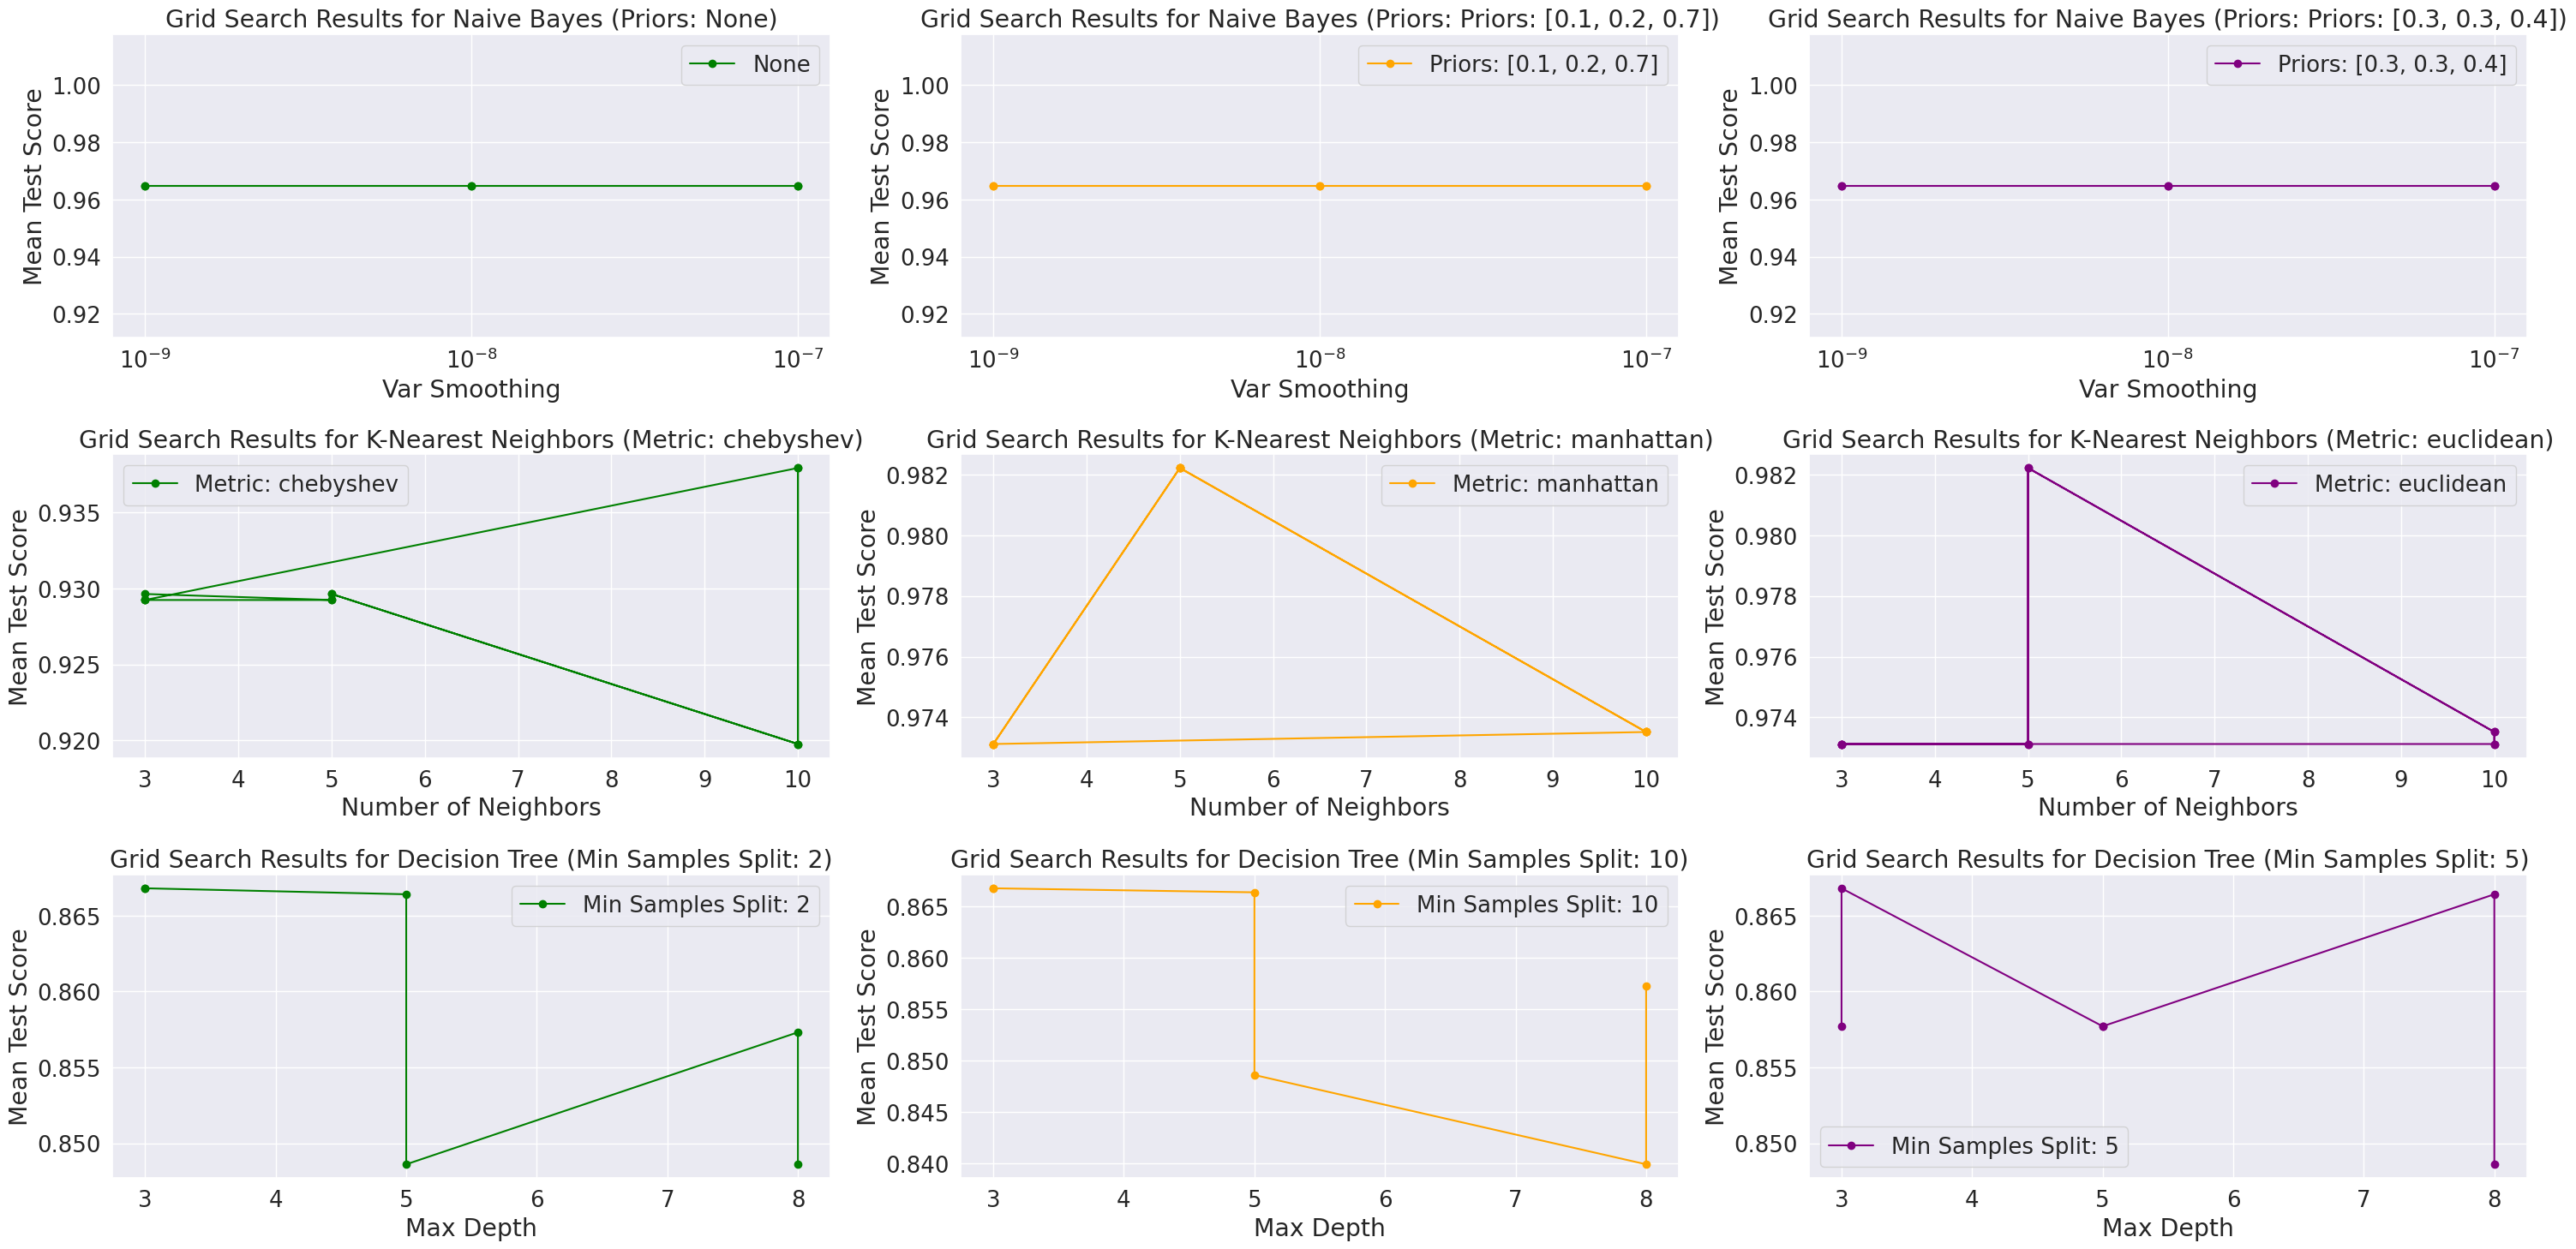

In [23]:
# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(30, 15))

# Colors for the plots
colors = ['green', 'orange', 'purple']

# Plot grid search results for Naive Bayes
for i, prior in enumerate([None, [0.1, 0.2, 0.7], [0.3, 0.3, 0.4]]):
    smoothing_scores = [score for param, score in zip(params_nb, scores_nb) if param['classifier__priors'] == prior]
    smoothing_params = [param['classifier__var_smoothing'] for param in params_nb if param['classifier__priors'] == prior]
    label = 'None' if prior is None else f'Priors: {prior}'
    axes[0, i].plot(smoothing_params, smoothing_scores, marker='o', label=label, color=colors[i])
    axes[0, i].set_xscale('log')
    axes[0, i].set_xlabel('Var Smoothing')
    axes[0, i].set_ylabel('Mean Test Score')
    axes[0, i].set_title(f'Grid Search Results for Naive Bayes (Priors: {label})')
    axes[0, i].legend()
    axes[0, i].grid(True)

# Plot grid search results for KNN
knn_metrics = set(param['classifier__metric'] for param in params_knn)
for i, metric in enumerate(knn_metrics):
    knn_neighbors_scores = [score for param, score in zip(params_knn, scores_knn) if param['classifier__metric'] == metric]
    knn_neighbors_params = [param['classifier__n_neighbors'] for param in params_knn if param['classifier__metric'] == metric]
    axes[1, i].plot(knn_neighbors_params, knn_neighbors_scores, marker='o', label=f'Metric: {metric}', color=colors[i])
    axes[1, i].set_xlabel('Number of Neighbors')
    axes[1, i].set_ylabel('Mean Test Score')
    axes[1, i].set_title(f'Grid Search Results for K-Nearest Neighbors (Metric: {metric})')
    axes[1, i].legend()
    axes[1, i].grid(True)

# Plot grid search results for Decision Tree
dtc_splits = set(param['classifier__min_samples_split'] for param in params_dtc)
for i, split in enumerate(dtc_splits):
    dtc_depth_scores = [score for param, score in zip(params_dtc, scores_dtc) if param['classifier__min_samples_split'] == split]
    dtc_depth_params = [param['classifier__max_depth'] for param in params_dtc if param['classifier__min_samples_split'] == split]
    axes[2, i].plot(dtc_depth_params, dtc_depth_scores, marker='o', label=f'Min Samples Split: {split}', color=colors[i])
    axes[2, i].set_xlabel('Max Depth')
    axes[2, i].set_ylabel('Mean Test Score')
    axes[2, i].set_title(f'Grid Search Results for Decision Tree (Min Samples Split: {split})')
    axes[2, i].legend()
    axes[2, i].grid(True)

plt.tight_layout()
plt.show()
plt.rcParams['font.family'] = 'DejaVu Sans'


In [19]:
model_results = {
    'Algorithm': ['Naive Bayes', 'KNN', 'Decision Tree'],
    'Optimal Parameters': [
        grid_search_gaussian_nb.best_params_,
        grid_search_knn.best_params_,
        grid_search_dtc.best_params_
    ],
    'Highest Accuracy': [
        grid_search_gaussian_nb.best_score_,
        grid_search_knn.best_score_,
        grid_search_dtc.best_score_
    ]
}

df_results = pd.DataFrame(model_results)

styled_table = df_results.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#444'), ('color', '#fff'), ('font-family', 'Helvetica')]},
    {'selector': 'tbody td', 'props': [('font-family', 'Verdana'), ('color', '#333')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#e0e0e0')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f7f7f7')]},
    {'selector': 'tr:hover', 'props': [('background-color', '#ffffcc')]}
]).set_properties(**{'text-align': 'center'})

styled_table


,Algorithm,Optimal Parameters,Highest Accuracy
0,Naive Bayes,"{'classifier__priors': None, 'classifier__var_smoothing': 1e-09, 'scaler': StandardScaler()}",0.964822
1,KNN,"{'classifier__algorithm': 'auto', 'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'scaler': MinMaxScaler()}",0.982213
2,Decision Tree,"{'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'scaler': StandardScaler()}",0.866798


## Part 3 - Experiments
You could add as many code cells as needed

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [20]:
X_train_data = train_df.drop(['target', 'total_phenols'], axis=1)
y_train_labels = train_df['target']
X_test_data = test_df.drop(['target', 'total_phenols'], axis=1)
y_test_labels = test_df['target']

scaler_model = MinMaxScaler()
X_train_scaled_data = scaler_model.fit_transform(X_train_data)
X_test_scaled_data = scaler_model.transform(X_test_data)

distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
highest_accuracy = 0
optimal_metric = ""

for distance in distance_metrics:
    knn_model = KNeighborsClassifier(n_neighbors=5, metric=distance, algorithm='auto')
    knn_model.fit(X_train_scaled_data, y_train_labels)
    
    predicted_labels = knn_model.predict(X_test_scaled_data)
    model_accuracy = accuracy_score(y_test_labels, predicted_labels)
    
    print(f"Accuracy using {distance} distance: {model_accuracy}")
    
    if model_accuracy > highest_accuracy:
        highest_accuracy = model_accuracy
        optimal_metric = distance

print(f"\nOptimal metric: {optimal_metric} with accuracy of {highest_accuracy}")

final_predictions = knn_model.predict(X_test_scaled_data)
conf_matrix = confusion_matrix(y_test_labels, final_predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=np.unique(y_test_labels), index=np.unique(y_test_labels))
conf_matrix_df.index.name = 'Actual Labels'
conf_matrix_df.columns.name = 'Predicted Labels'



Accuracy using euclidean distance: 0.9722222222222222
Accuracy using manhattan distance: 0.9722222222222222
Accuracy using chebyshev distance: 0.9166666666666666

Optimal metric: euclidean with accuracy of 0.9722222222222222


## Part 5 - Apply on test and show model performance estimation

Accuracy with euclidean metric: 0.9722222222222222


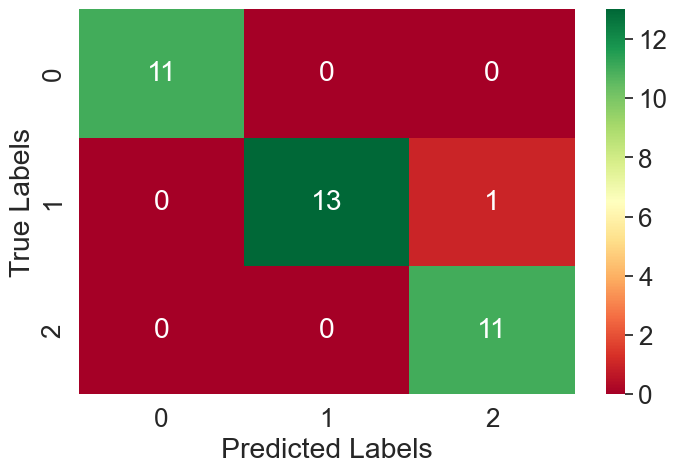

In [21]:

#Verify the best performing metric from the previous code
optimal_distance = 'euclidean'  #or 'chebyshev'

#Create the model using the best metric
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric=optimal_distance, algorithm='auto')
knn_classifier.fit(X_train_scaled_data, y_train_labels)

#Predict and calculate accuracy
final_predictions = knn_classifier.predict(X_test_scaled_data)

model_accuracy = accuracy_score(y_test_labels, final_predictions)
print(f"Accuracy with {optimal_distance} metric: {model_accuracy}")

#Plot confusion matrix
conf_matrix = confusion_matrix(y_test_labels, final_predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=np.unique(y_test_labels), index=np.unique(y_test_labels))
conf_matrix_df.index.name = 'True Labels'
conf_matrix_df.columns.name = 'Predicted Labels'

plt.figure(figsize=(8, 5))
sns.set(font_scale=1.7)
sns.heatmap(conf_matrix_df, cmap="RdYlGn", annot=True, fmt='g')
plt.show()
